# Unsupervised Learning-(E-commerce)


In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir("C:\\Users\\USER\\Downloads")

1. Load the required libraries and read the dataset.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("renttherunway.csv")

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features

In [6]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [8]:
df.shape

(192544, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

3. Check if there are any duplicate records in the dataset? If any, drop them.

In [15]:
df.duplicated().sum()

0

4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’)

In [18]:
df.drop('user_id',axis=1,inplace=True)

In [19]:
df.drop('review_text',axis=1,inplace=True)

In [21]:
df.drop('review_summary',axis=1,inplace=True)

In [22]:
df

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,34dd,2252812,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,32c,682043,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,36a,683251,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,36c,126335,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0,"November 25, 2015"


5. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [38]:
df['weight'].dtype

dtype('O')

In [40]:
df['weight'] = df['weight'].str.replace('lbs')

In [42]:
df

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,34c,126335,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,34b,616682,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,34dd,2252812,140,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,32c,682043,100,10.0,work,petite,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,36a,683251,135,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,36c,126335,165,10.0,wedding,pear,dress,"5' 6""",16,31.0,"November 25, 2015"


6. Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'. 

In [45]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

7. The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype. 

In [ ]:
df('height_inches') = (df.height.str.split(" ' ").str[0].astype(float)*12) + df.Height.str.split("'").str[1].astype(float)

8. Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods.

In [47]:
df.isnull().sum()

Unnamed: 0         0
fit                0
bust size      18411
item_id            0
weight         29982
rating            82
rented for        10
body type      14637
category           0
height           677
size               0
age              960
review_date        0
dtype: int64

In [90]:
df.isnull().sum().sum()

0

In [91]:
df = df.fillna(value = 0)
df

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,0,34d,2260466,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,77
1,1,0,34b,153475,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,1189
2,2,0,0,1063761,0,10.0,party,0,sheath,"5' 4""",4,116.0,411
3,3,0,34c,126335,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0,607
4,4,0,34b,616682,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0,2205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,0,34dd,2252812,140,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0,1558
192540,192540,0,32c,682043,100,10.0,work,petite,dress,"5' 1""",4,29.0,2236
192541,192541,0,36a,683251,135,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0,1466
192542,192542,0,36c,126335,165,10.0,wedding,pear,dress,"5' 6""",16,31.0,1807


9. Check the statistical summary for the numerical and categorical columns and
write your findings.

In [92]:
df.describe()

,Unnamed: 0,fit,item_id,rating,size,age,review_date
count,192544.000000,192544.000000,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,0.396091,1.045684e+06,9.088499,12.245175,33.702141,1182.783089
std,55582.809453,0.712024,8.053148e+05,1.441995,8.494877,8.384539,669.944180
min,0.000000,0.000000,1.233730e+05,0.000000,0.000000,0.000000,0.000000
25%,48135.750000,0.000000,1.950760e+05,8.000000,8.000000,29.000000,583.000000
50%,96271.500000,0.000000,9.483960e+05,10.000000,12.000000,32.000000,1225.000000
75%,144407.250000,1.000000,1.678888e+06,10.000000,16.000000,37.000000,1760.000000
max,192543.000000,2.000000,2.966087e+06,10.000000,58.000000,117.000000,2273.000000


10. Are there outliers present in the column age? If yes, treat them with the
appropriate method.

In [59]:
df1 = df.copy()

<Axes: >

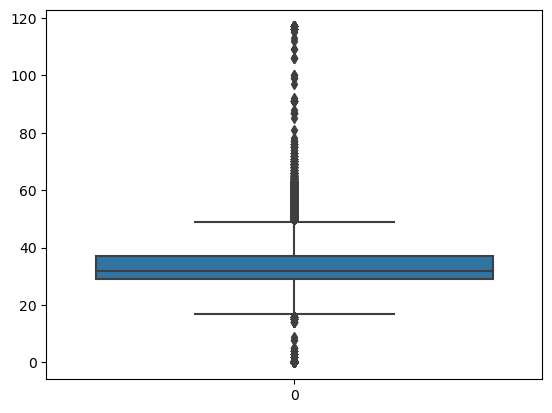

In [62]:
sns.boxplot(df['age'])

In [63]:
#using IQR method
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)


29.0
37.0
8.0


In [64]:
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [70]:
df1_out = df1.loc [(df1['age'] < upper_whisker) & (df1['age'] > lower_whisker)]
df1_out.shape
df1_out.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
3,3,fit,34c,126335,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,34b,616682,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"
5,5,fit,32b,364092,138,8.0,date,athletic,dress,"5' 8""",8,45.0,"April 30, 2016"


<Axes: >

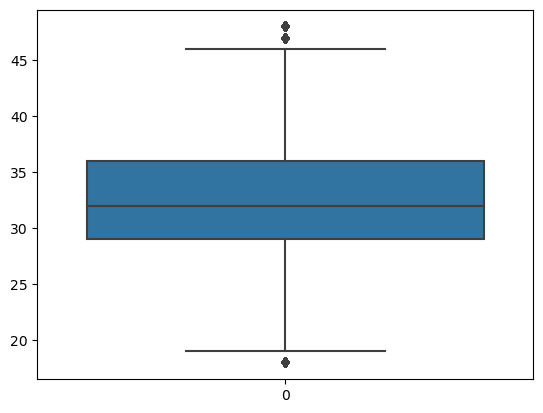

In [71]:
sns.boxplot(df1_out.age)

11. Check the distribution of the different categories in the column 'rented for'
using appropriate plot. 

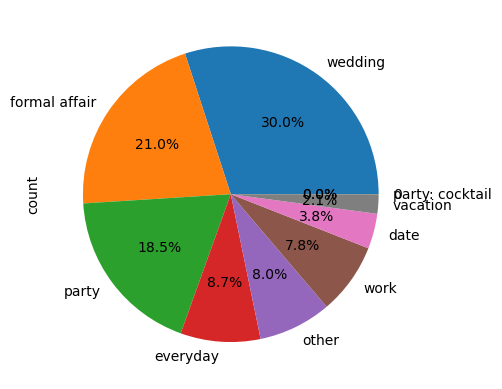

In [73]:
df1['rented for'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

12. Encode the categorical variables in the dataset.

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   192544 non-null  int64  
 1   fit          192544 non-null  object 
 2   bust size    192544 non-null  object 
 3   item_id      192544 non-null  int64  
 4   weight       192544 non-null  object 
 5   rating       192544 non-null  float64
 6   rented for   192544 non-null  object 
 7   body type    192544 non-null  object 
 8   category     192544 non-null  object 
 9   height       192544 non-null  object 
 10  size         192544 non-null  int64  
 11  age          192544 non-null  float64
 12  review_date  192544 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 19.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes('object').columns:
   le=LabelEncoder()
df1[col]=le.fit_transform(df1[col])

In [ ]:
cate=['fit','bust size','weight','rented for','body type','category','height']
lbl_encode = LabelEncoder()
for i in cate:
    df1[i]=df1[[i]].apply(lbl_encode.fit_transform)

13. Standardize the data, so that the values are within a particular range.

In [ ]:
import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.Dataframe(scaled_features,index=df1.index,columns=df1.columns)

14. Apply PCA on the above dataset and determine the number of PCA
components to be used so that 90-95% of the variance in data is explained by
the same.

In [ ]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

In [ ]:
eig_vals,eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein_vectors','\n',eig_vectors)

In [ ]:
total = sum(eig_vals)
var_exp = [(i/total*100 for i in sorted(eig_vals,reverse=True))]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance:'var_exp)
print('Cummilative Variance Explained:'cum_var_exp) 

In [ ]:
plt.bar(range(10),var_exp,align='centre',color='lightgreen',edgecolor='black',label='Explained Variable')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Screen Plot')
plt.legend(loc='best')
plt.show()

15. Apply K-means clustering and segment the data. (You may use original
data or PCA transformed data) 

In [ ]:
pca = PCA(n_componenets=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

In [ ]:
cluster_errors = []
cluster_range = (2,15)
for num_cluster in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)


In [ ]:
Cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker=0,color='b')

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

In [ ]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [ ]:
kmeans_df = pca_df.join(lable)
kmeans_df.head()

In [ ]:
kmeans_df['Label'].value_counts()

In [ ]:
sns.scatterplot(kmeans_df['PC1'],Kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

16. Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data)

In [ ]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range(2,15):
    heir=AgglomerativeClustering(n_clusters=i)
    heir=heir.fit(scaled_features_df)
    labels=heir.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_d,labels))

In [ ]:
hei_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hei_cluster_model = hei_cluster.fit(scaled_features_df)

In [ ]:
df_label1=pd.DataFrame(hei_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

In [ ]:
df_heir=dfc.join(df_label1)
df_heir.head()